- Dropout
- Early Stopping 최적의 model


- vgg16,19
- Resnet, EfficientNet 등 모델 활용
https://keras.io/api/applications/


- Data Augmentation이 가능한지


< Transfer Learning >
- Initialize Parameters
- Freeze CNN
- Fine Tuning


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# 드라이브 마운트

In [1]:
import tensorflow as tf
tf.test.gpu_device_name() # GPU 사용중인지 확인

'/device:GPU:0'

# Convolutional Neural Networks : Classification Assignment

# Data 

## Loading Data

* 공유 드라이브에서 데이터셋 가져오기

In [2]:
import os, shutil

In [3]:
# 기본 경로
original_dir='/content/drive/Shareddrives/Practical_Computer_Vision/week_2/Classification'
base_dir='/content/drive/MyDrive/datasets'

# if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
#     shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
# os.mkdir(base_dir)

train_dir=os.path.join(base_dir,'train')
# os.mkdir(train_dir)

valid_dir=os.path.join(base_dir,'validation')
# os.mkdir(valid_dir)

test_dir=os.path.join(original_dir,'test')


org_train_dir=os.path.join(original_dir,'train')


In [4]:
label_names=os.listdir(org_train_dir)
print(label_names)

['glacier', 'buildings', 'forest', 'street', 'sea', 'mountain']


In [5]:
# for names in label_names:
#   a=os.path.join(org_train_dir,names)
#   tra_tmp=os.path.join(train_dir,names)
#   os.mkdir(tra_tmp)
#   val_tmp=os.path.join(valid_dir,names)
#   os.mkdir(val_tmp)
  
#   number_of_files=len(os.listdir(a))
#   files=os.listdir(a)

#   for fname in files[:number_of_files//3]: # 1/3만큼 validation data 생성
#     src=os.path.join(a,fname)
#     dst=os.path.join(val_tmp,fname)
#     shutil.copyfile(src,dst)

#   for fname in files[number_of_files//3:]: # 나머지 2/3만큼 train data 생성
#     src=os.path.join(a,fname)
#     dst=os.path.join(tra_tmp,fname)
#     shutil.copyfile(src,dst)


In [6]:
# 알맞게 복사됐는지 확인
for names in label_names:
  tra_tmp=os.path.join(train_dir,names)
  val_tmp=os.path.join(valid_dir,names)

  print(names)
  print(f'Number of Train, {names} data : {len(os.listdir(tra_tmp))}')
  print(f'Number of Validation, {names} data : {len(os.listdir(val_tmp))}')



glacier
Number of Train, glacier data : 1603
Number of Validation, glacier data : 801
buildings
Number of Train, buildings data : 1461
Number of Validation, buildings data : 730
forest
Number of Train, forest data : 1514
Number of Validation, forest data : 757
street
Number of Train, street data : 1588
Number of Validation, street data : 794
sea
Number of Train, sea data : 1516
Number of Validation, sea data : 758
mountain
Number of Train, mountain data : 1675
Number of Validation, mountain data : 837


## Data Preprocessing

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일 조정
train_datagen=ImageDataGenerator(rescale=1.0/255.)
validation_datagen=ImageDataGenerator(rescale=1.0/255.)
# test_datagen=ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # categorical_crossentropy 손실을 사용하기 때문에 다중 레이블이 필요합니다
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        # 타깃 디렉터리
        valid_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # categorical_crossentropy 손실을 사용하기 때문에 다중 레이블이 필요합니다
        class_mode='categorical')

# test_generator=test_datagen.flow_from_directory(
#         test_dir,
#         target_size=(150,150),
#         batch_size=20,
#         class_mode='categorical'
# )

Found 9357 images belonging to 6 classes.
Found 4677 images belonging to 6 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20, 6)


# Build Model

## Initialized Parameters

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

컴파일 단계에서 `RMSprop` 옵티마이저를 선택하겠습니다. 네트워크의 마지막은  다중분류 layer이므로, 활성화함수는` softmax`를 사용하고, `categorical_crossentropy`를 손실함수로 사용합니다.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 14s 63ms/step - loss: 2.4568 - acc: 0.2618 - val_loss: 1.2599 - val_acc: 0.4940
Epoch 2/30
100/100 [==============================] - 6s 64ms/step - loss: 1.3312 - acc: 0.4688 - val_loss: 1.1584 - val_acc: 0.5300
Epoch 3/30
100/100 [==============================] - 6s 61ms/step - loss: 1.1096 - acc: 0.5625 - val_loss: 1.0693 - val_acc: 0.5640
Epoch 4/30
100/100 [==============================] - 6s 60ms/step - loss: 0.9581 - acc: 0.6237 - val_loss: 1.1249 - val_acc: 0.5650
Epoch 5/30
100/100 [==============================] - 6s 61ms/step - loss: 0.9224 - acc: 0.6473 - val_loss: 0.8231 - val_acc: 0.6980
Epoch 6/30
100/100 [==============================] - 6s 61ms/step - loss: 0.8492 - acc: 0.6839 - val_loss: 0.7655 - val_acc: 0.7310
Epoch 7/30
100/100 [==============================] - 6s 62ms/step - loss: 0.7514 - acc: 0.7375 - val_loss: 0.7278 - val_acc: 0.7440
Epoch 8/30
100/100 [==============================] - 6s 61ms/step -

In [ ]:
model.save('initial_parameters.h5')

In [ ]:
import matplotlib.pyplot as plt

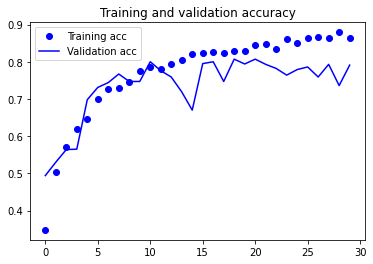

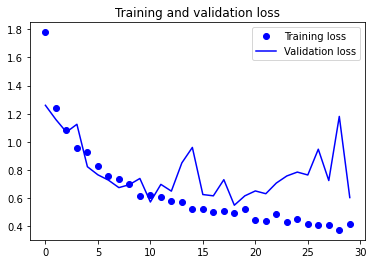

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

이 그래프는 과대적합의 특성을 보여줍니다. 훈련 정확도가 시간이 지남에 따라 선형적으로 증가해서 거의 100%에 도달합니다. 반면 검증 정확도는 70-72%에서 멈추었습니다. 

비교적 훈련 샘플의 수(2,000개)가 적기 때문에 과대적합이 발생하기 쉽다.

## Freeze CNN

### Freeze CNN-1

In [9]:
from keras.applications import VGG16

In [10]:
conv_base=VGG16(weights='imagenet',
                include_top=False,
                input_shape=(150,150,3))

58892288/58889256 [==============================] - 0s 0us/step


In [11]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

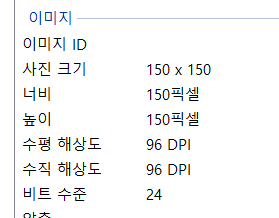

In [12]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255.)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,6))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(valid_dir, 1000)

Found 9357 images belonging to 6 classes.
Found 4677 images belonging to 6 classes.


In [13]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))

In [14]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 8ms/step - loss: 1.8149 - acc: 0.2707 - val_loss: 1.0547 - val_acc: 0.7240
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 1.0665 - acc: 0.6146 - val_loss: 0.7823 - val_acc: 0.7680
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.8272 - acc: 0.7226 - val_loss: 0.6370 - val_acc: 0.8030
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.6982 - acc: 0.7546 - val_loss: 0.5661 - val_acc: 0.8320
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.6209 - acc: 0.7724 - val_loss: 0.5263 - val_acc: 0.8310
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.5635 - acc: 0.8000 - val_loss: 0.4896 - val_acc: 0.8380
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.5063 - acc: 0.8185 - val_loss: 0.4709 - val_acc: 0.8460
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1542      
Total params: 2,098,950
Trainable params: 2,098,950
Non-trainable params: 0
_________________________________________________________________


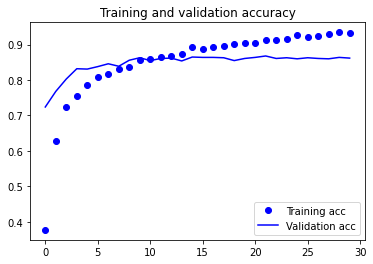

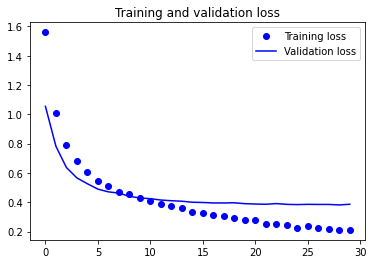

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Freeze CNN-2

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 1542      
Total params: 16,813,638
Trainable params: 16,813,638
Non-trainable params: 0
_________________________________________________________________


In [19]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30


In [20]:
conv_base.trainable = False

In [21]:
print('conv_base를 동결한 후 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [22]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop

train_datagen2 = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안됨
valid_datagen2 = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen2.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # categorical_crossentropy 손실을 사용하므로 다중 레이블이 필요합니다
        class_mode='categorical')

valid_generator2 = valid_datagen2.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=2e-5),
              metrics=['acc'])


Found 9357 images belonging to 6 classes.
Found 4677 images belonging to 6 classes.


In [23]:
history = model.fit_generator(
      train_generator2,
      steps_per_epoch=100,
      epochs=30,
      validation_data=valid_generator2,
      validation_steps=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 938s 9s/step - loss: 1.5010 - acc: 0.4623 - val_loss: 0.9480 - val_acc: 0.7320
Epoch 2/30
100/100 [==============================] - 725s 7s/step - loss: 0.8893 - acc: 0.7295 - val_loss: 0.7067 - val_acc: 0.7620
Epoch 3/30
100/100 [==============================] - 597s 6s/step - loss: 0.7200 - acc: 0.7762 - val_loss: 0.5925 - val_acc: 0.8200
Epoch 4/30
100/100 [==============================] - 537s 5s/step - loss: 0.6228 - acc: 0.7915 - val_loss: 0.5349 - val_acc: 0.8090
Epoch 5/30
100/100 [==============================] - 385s 4s/step - loss: 0.5762 - acc: 0.7991 - val_loss: 0.5197 - val_acc: 0.8150
Epoch 6/30
100/100 [==============================] - 297s 3s/step - loss: 0.5380 - acc: 0.8225 - val_loss: 0.4540 - val_acc: 0.8610
Epoch 7/30
100/100 [==============================] - 219s 2s/step - loss: 0.4932 - acc: 0.8308 - val_loss: 0.4275 - val_acc: 0.8530
Epoch 8/30
100/100 [==============================] - 191s 2s/step - 

In [24]:
model.save('freezecnn.h5')

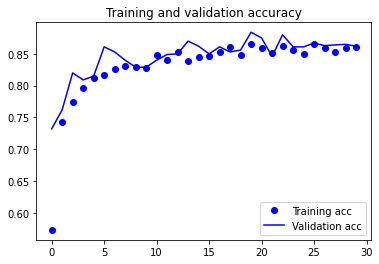

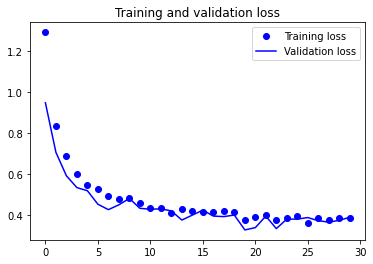

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Fine Tuning

In [26]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [27]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/40


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 [==============================] - 11s 105ms/step - loss: 0.3395 - acc: 0.8712 - val_loss: 0.3732 - val_acc: 0.8710
Epoch 2/40
100/100 [==============================] - 11s 111ms/step - loss: 0.2998 - acc: 0.8946 - val_loss: 0.3497 - val_acc: 0.8840
Epoch 3/40
100/100 [==============================] - 11s 107ms/step - loss: 0.2476 - acc: 0.9159 - val_loss: 0.3520 - val_acc: 0.8690
Epoch 4/40
100/100 [==============================] - 10s 103ms/step - loss: 0.2212 - acc: 0.9197 - val_loss: 0.3123 - val_acc: 0.8900
Epoch 5/40
100/100 [==============================] - 10s 102ms/step - loss: 0.2255 - acc: 0.9215 - val_loss: 0.3411 - val_acc: 0.8910
Epoch 6/40
100/100 [==============================] - 10s 102ms/step - loss: 0.1799 - acc: 0.9316 - val_loss: 0.3469 - val_acc: 0.8860
Epoch 7/40
100/100 [==============================] - 10s 103ms/step - loss: 0.1762 - acc: 0.9446 - val_loss: 0.3116 - val_acc: 0.8970
Epoch 8/40
100/100 [==============================] - 10s 103ms/st

In [29]:
model.save('finetuning.h5')

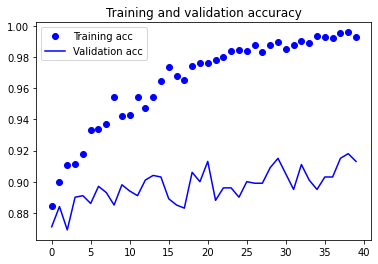

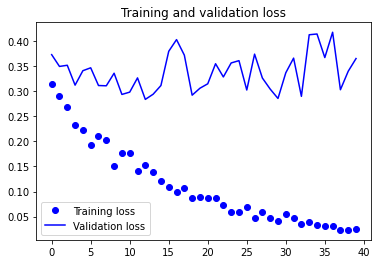

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission


In [32]:
from keras.models import load_model

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 1542      
Total params: 16,813,638
Trainable params: 9,178,374
Non-trainable params: 7,635,264
_________________________________________________________________


In [33]:
import cv2
import os

test_dir2='/content/drive/Shareddrives/Practical_Computer_Vision/week_2/Classification/test'
fnames=os.listdir(test_dir)
mapping={0:'buildings',1:'forest',2:'glacier',3:'mountain',4:'sea',5:'street'}

In [55]:
#원리
img_BGR=cv2.imread(test_dir2+'/'+fnames[16],cv2.IMREAD_COLOR)
img_RGB=cv2.cvtColor(img_BGR,cv2.COLOR_BGR2RGB)

img_RGB=cv2.resize(img_RGB,(150,150),interpolation=cv2.INTER_LINEAR)

img_RGB=np.expand_dims(img_RGB,0)
img_RGB=img_RGB/255.

print(img_RGB.shape)
print(img_RGB)
print(fnames[16],mapping[np.argmax(model.predict(img_RGB))])

(1, 150, 150, 3)
[[[[0.08627451 0.11372549 0.08627451]
   [0.04705882 0.07843137 0.02745098]
   [0.08235294 0.11372549 0.02352941]
   ...
   [0.85098039 0.87058824 0.84313725]
   [0.94117647 0.94509804 0.91372549]
   [0.63529412 0.63921569 0.60784314]]

  [[0.14509804 0.17254902 0.14509804]
   [0.15294118 0.18431373 0.14117647]
   [0.01960784 0.04705882 0.        ]
   ...
   [0.8        0.81960784 0.79607843]
   [0.77254902 0.78431373 0.75686275]
   [0.17647059 0.18039216 0.15686275]]

  [[0.00392157 0.03921569 0.01960784]
   [0.09019608 0.1254902  0.10588235]
   [0.27843137 0.30588235 0.27843137]
   ...
   [0.88235294 0.89803922 0.89411765]
   [0.70588235 0.71372549 0.70196078]
   [0.02352941 0.03137255 0.01960784]]

  ...

  [[0.48235294 0.51764706 0.50588235]
   [0.51372549 0.5372549  0.52156863]
   [0.63137255 0.64313725 0.60784314]
   ...
   [0.56862745 0.58431373 0.58039216]
   [0.30980392 0.33333333 0.3254902 ]
   [0.43137255 0.45490196 0.44705882]]

  [[0.54509804 0.57647059 0.

In [59]:
import pandas as pd

output=[]
mapping={0:'buildings',1:'forest',2:'glacier',3:'mountain',4:'sea',5:'street'}

for file in fnames:
  tmp=[]
  img_BGR=cv2.imread(test_dir2+'/'+file,cv2.IMREAD_COLOR)
  img_RGB=cv2.cvtColor(img_BGR,cv2.COLOR_BGR2RGB)
  img_RGB=cv2.resize(img_RGB,(150,150),interpolation=cv2.INTER_LINEAR)
  img_RGB=np.expand_dims(img_RGB,0)
  img_RGB=img_RGB/255.

  a=mapping[np.argmax(model.predict(img_RGB))]
  tmp.append(file)
  tmp.append(a)
  output.append(tmp)




In [60]:
import pandas as pd

output1=pd.DataFrame(output)
output1.head(5)



,0,1
0,20498.jpg,street
1,20270.jpg,street
2,20388.jpg,street
3,20464.jpg,street
4,20670.jpg,street


In [61]:
output1.columns=['name','class']
ans=output1.sort_values(by='name')
ans.head(10)


,name,class
2455,20056.jpg,forest
2762,20057.jpg,buildings
1688,20058.jpg,mountain
2043,20059.jpg,glacier
2767,20060.jpg,buildings
2768,20061.jpg,buildings
2477,20062.jpg,forest
2771,20064.jpg,buildings
892,20066.jpg,street
898,20067.jpg,buildings


In [63]:
ans.index

Int64Index([2455, 2762, 1688, 2043, 2767, 2768, 2477, 2771,  892,  898,
            ...
            2451, 1281, 2479, 1711, 2042,  891, 1284, 1312,  459, 1713],
           dtype='int64', length=3000)

In [62]:
ans.to_csv('team2_submission1.csv',index=False)